# Sample Dependence

Goal: for the hybrid training, look into the performance in mc16a, which has a *lower PU profile*.

Retraining Campaign - Dec 2018

In [1]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("../..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


## Load in the model

In [2]:
subDir = 'mc16d_PFlow_hybrid_1.5TeV'
dataDir = '../../data/'+subDir
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTagTrain = "5mtrain_15trks_{}_sd0_rev".format(vStr)

modelDir = '../../models/'+subDir
m = myLSTM(modelDir=modelDir, nFeatures=13, dataTag=dataTagTrain, nHidden=200, loadModel=True)

Initialize method from myModel()
Loading previously trained LSTM


## Get the efficiencies

In [3]:
leffs, ceffs, beffs = [],[],[]

discs, mus, ys = [],[],[]

mcs = ['mc16d','mc16a','mc16e'] 
physicsSamples = ['ttbar','Zprime_1.5TeV']

figDir='../../figures'

for physicsSample in physicsSamples:

    for mc in mcs:
        
        # Open the file
        subDir = '{}_PFlow_{}'.format(mc, physicsSample)
        dataDir = '../../data/'+subDir
        dataTagTest = "2mtest_15trks_{}_sd0_rev_{}hybrid_1.5TeV_scale".format(vStr,'mc16d_'if mc== 'mc16e' else '')

        f_name = "{}/data_{}.hdf5".format(dataDir,dataTagTest)

        f = h5py.File(f_name,"r")
        X = f['X_test'][:]
        y = f['y_test'][:]
        ix = f['ix_test'][:]
        f.close()

        # Get the discriminant
        tag='train_mc16d_hybrid_1.5TeV_eval_{}_{}'.format(mc,physicsSample)
        (leff, ceff, beff), disc = getEffs(m, X, y, ix, returnDisc=True, modelDir=m.modelDir,
                                           figDir=figDir, subDir=subDir,tag=tag)
        leffs.append(leff)
        ceffs.append(ceff)
        beffs.append(beff)
        
        # For the mc16d training, maybe it would be a good idea to see what the performance
        # looks like as a function of mu. 
        #if mc == 'mc16d':
            
        discs.append(disc)

        df = pd.read_hdf('{}/jet_2mtest_15trks_sd0_rev.h5'.format(dataDir), key='jet_df')
        # For some reason when I made the files, it looked like I didn't append the 
        # variable name to the mu variable
        mus.append(df[''])
        ys.append(y)

Load in the previously saved efficiency file
Load in the previously saved efficiency file
Load in the previously saved efficiency file
Load in the previously saved efficiency file
Load in the previously saved efficiency file
Load in the previously saved efficiency file


In [4]:
len(mus)

6

In [5]:
df = pd.read_hdf('{}/jet_2mtest_15trks_sd0_rev.h5'.format(dataDir), key='jet_df')
print(df.columns)

Index(['LabDr_HadF', 'pt_orig', 'eta_orig', 'phi_orig', 'm', 'ip3d_llr',
       'ip3d_pb', 'ip3d_pc', 'ip3d_pu', 'ip3d_ntrk', 'aliveAfterOR',
       'aliveAfterORmu', 'JVT', 'pt', 'eta', 'rnnip_pu', 'rnnip_pc',
       'rnnip_pb', 'rnnip_ptau', ''],
      dtype='object')


Before I keep going... do I have access to $\mu$ in these files?

## Evaluate on $t\bar{t}$

In [6]:
%%bash
ls ../../data/mc16a_PFlow_ttbar/

data_2mtest_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_hybridScale.hdf5
data_2mtest_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_hybrid_1.5TeV_scale.hdf5
data_2mtest_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_mc16dScale.hdf5
jet_2mtest_15trks_sd0_rev.h5
trk_2mtest_15trks_sd0_rev.nc


/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk


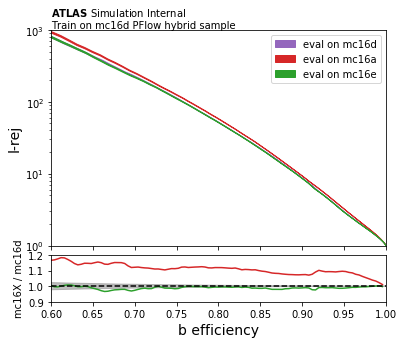

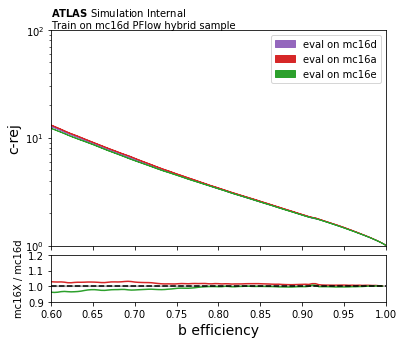

In [7]:
labels = ['eval on mc16d','eval on mc16a','eval on mc16e']
colors = ['C4','C3','C2']
nTest = 1.5e6
rlabel = 'mc16X / mc16d'

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+="Train on mc16d PFlow hybrid sample"

plotROCRatio(beffs[:3], leffs[:3], labels, rrange=(0.9,1.2),
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,figDir=figDir,subDir='mc16a_PFlow_ttbar',
             tag='lrej_mc16d_hybrid_1.5TeV_training',rlabel=rlabel)

plotROCRatio(beffs[:3], ceffs[:3], labels, rrange=(0.9,1.2),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,figDir=figDir,subDir='mc16a_PFlow_ttbar',
             tag='crej_mc16d_hybrid_1.5TeV_training',rlabel=rlabel)


Lesson: Training on the "harder problem" let's us solve for an optimal solution for mc16a as well.

## Evaluate on Z'

../../plottingFcts.py:573: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)


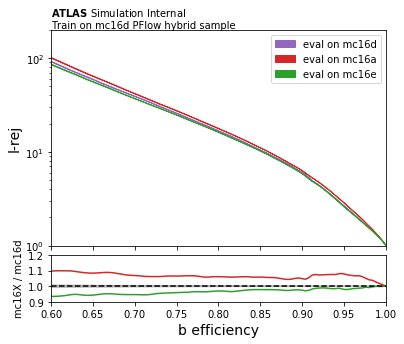

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk


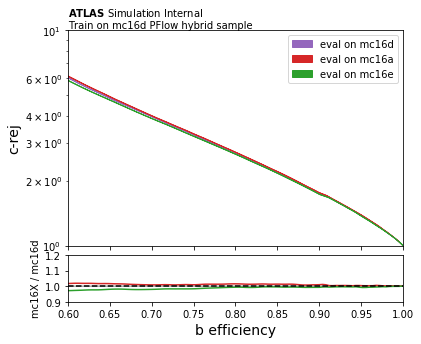

In [8]:
plotROCRatio(beffs[3:], leffs[3:], labels, rrange=(0.9,1.2),ymax=200,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,figDir=figDir,subDir='mc16a_PFlow_Zprime_1.5TeV',
             tag='lrej_mc16d_hybrid_1.5TeV_training',rlabel=rlabel)

plotROCRatio(beffs[3:], ceffs[3:], labels, rrange=(0.9,1.2),ymax=10,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,figDir=figDir,subDir='mc16a_PFlow_Zprime_1.5TeV',
             tag='crej_mc16d_hybrid_1.5TeV_training',rlabel=rlabel)

The same conclusions hold for Z' as well, although the improvement in evaluating on mc16a might not be as drastic.

## $\mu$ dependence of our mc16d hybrid training 

Ok, so this will be a suite of four plots as well to tell us whether the variation in performance is explainable by the $\mu$ dependence of the samples.

There are four plots because I have the l and c rejection for ttbar and Z', but maybe I could just make two so I don't have to separate out ttbar and Z'.

Also, in terms of a ratio plot, I really don't understand which should be my reference curve.

Zprime_1.5TeV
   mc16d
   mc16a
   mc16e
Zprime_1.5TeV
   mc16d
   mc16a
   mc16e


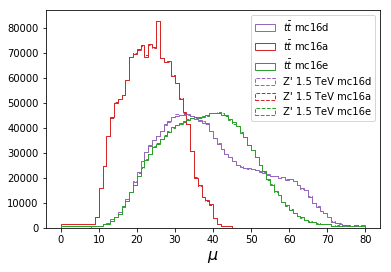

In [9]:
# Step 1: Sanity check: Take a look at the PU profile of mc16d

n_mc = len(mcs)
n_samples = len(physicsSamples)

plt.figure()
for i, sampleTag, s in zip(range(n_samples),[r'$t\bar{t}$','Z\' 1.5 TeV'],['-','--','-.']):
    
    print(physicsSample)
        
    for j, mc,c in zip(range(n_mc),mcs,['C4','C3','C2']):
    
        print("  ",mc)
    
        idx = i*n_mc + j

        label = sampleTag + ' ' + mc
        plt.hist(mus[idx],bins=80,range=(0,80),color=c,linestyle=s,
                 histtype='step',label=label)
plt.xlabel('$\mu$',fontsize=16)
plt.legend()
plt.show()

In [10]:
mus[0].mean()

39.42853566729355

In [11]:
mus[2].mean()

38.84328428899161

In [12]:
mus[0].min(),mus[0].max()

(8.5, 80.5)

In [13]:
mus[1].min(),mus[1].max()

(0.5, 44.5)

ttbar
mc16d
mc16a


/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


mc16e


../../plottingFcts.py:526: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


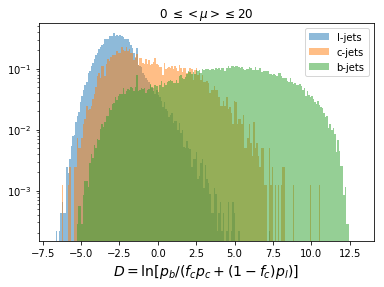

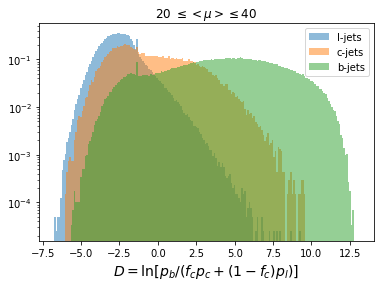

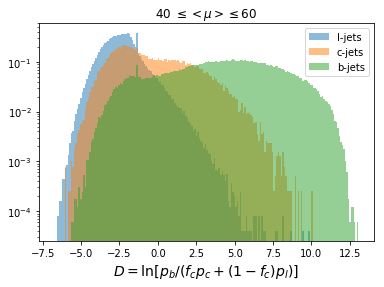

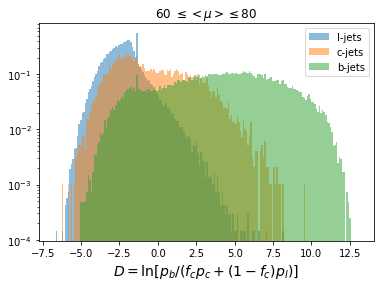

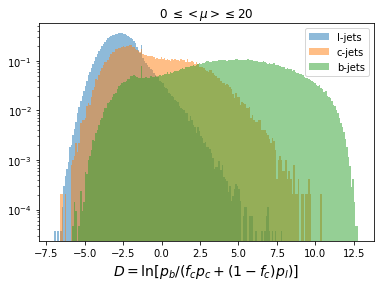

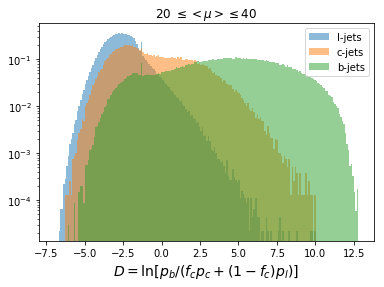

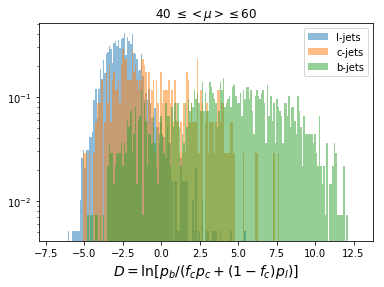

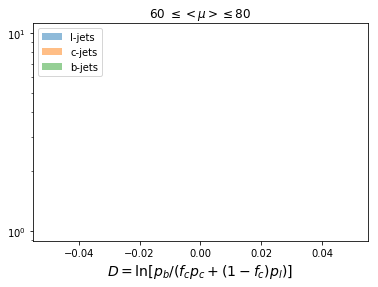

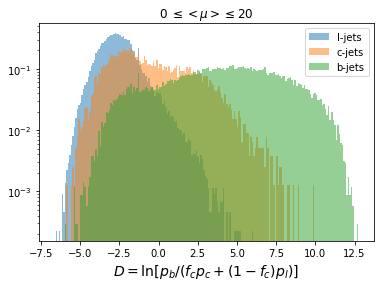

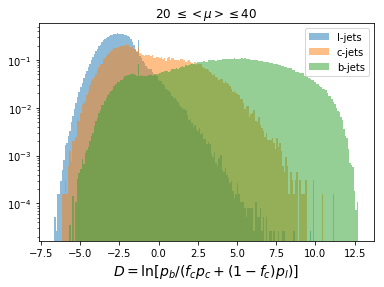

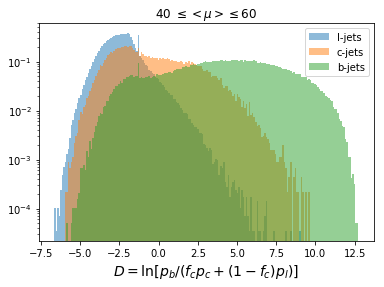

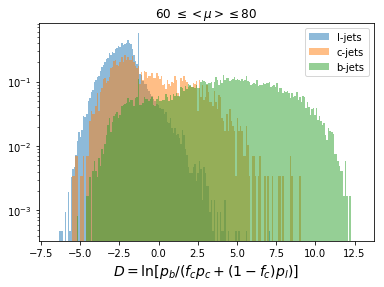

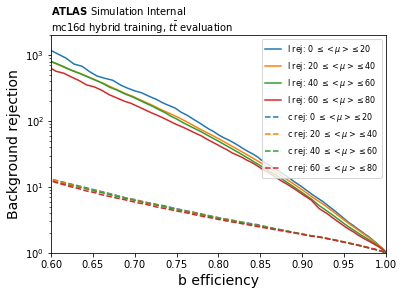

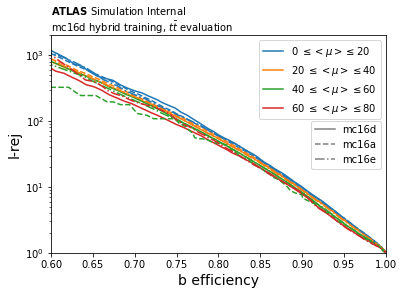

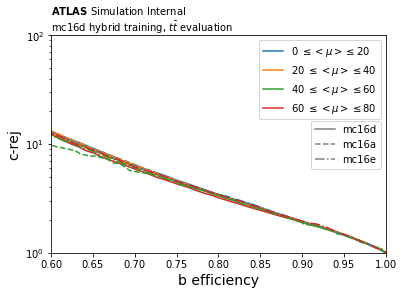

In [14]:
mu_edges = np.arange(1, 101, 20)
nBins = 200

muBins = mu_edges.size-1
colors = ['C{}'.format(i) for i in range(muBins)] * n_mc
styles = ['-'] * muBins + ['--'] * muBins + ['-.'] * muBins

for i, sampleTag, physicsSample, l_ymax, c_ymax in zip(range(n_samples)[:1],[r'$t\bar{t}$','Z\' 1.5 TeV'],physicsSamples,[2e3,200],[100,10]):
    
    print(physicsSample)
    
    mu_leffs = []
    mu_ceffs = []
    mu_beffs = []
    mu_labels = []
    
    for j, mc in zip(range(n_mc),mcs):
    
        print(mc)
    
        idx = i*n_mc + j
    
        disc, mu, y = discs[idx], mus[idx], ys[idx]
        myRange = ( np.min(disc), np.max(disc) )

        for mu_min, mu_max in zip(mu_edges[:-1], mu_edges[1:]):

            effs = []
            plt.figure()
            for output, flavor in zip([0,1,2], ['l','c','b']):

                ix = (y == output) & (mu > mu_min) & (mu < mu_max)

                # Plot the discriminant output
                nEntries, _,_ = plt.hist(disc[ix],alpha=0.5,label='{}-jets'.format(flavor),
                                         bins=nBins, range=myRange, density=True, log=True)

                # Calculate the baseline signal and bkg efficiencies
                eff = calculateEff(nEntries)
                effs.append(eff)

            # I'm not really sure why I needed this -1, but I went ahead and just included it.
            label = '{} $\leq < \mu > \leq${}'.format(mu_min-1,mu_max-1)
            plt.title(label)
            plt.legend()
            plt.xlabel('$D = \ln [ p_b / (f_c p_c + (1- f_c)p_l ) ]$',fontsize=14)

            mu_leffs.append(effs[0])
            mu_ceffs.append(effs[1])
            mu_beffs.append(effs[2])
            if j == 0:
                mu_labels.append(label)
        
    # Create new text to add to this figure
    text="$\mathbf{ATLAS}$ Simulation Internal\n"
    text+="mc16d hybrid training, "
    text+=sampleTag
    text+=" evaluation"
    subDir='mc16d_PFlow_hybrid_1.5TeV'

    # Idea: Maybe I should plot both mc16d w/ l and c overlaid and the full 
    # smaple dependence w/ everything
    btagROC(mu_beffs[:muBins], mu_leffs[:muBins], mu_ceffs[:muBins], mu_labels,
        colors=colors,loc='upper right', legFontSize=8, 
        ymax=l_ymax, figDir=figDir, subDir=subDir,text=text,
        tag='{}_muBins'.format(physicsSample))

    fakeLabels = [None for x in mu_beffs]
    
    leg1 = {'colors': ['C{}'.format(i) for i in range(muBins)],
            'styles': ['-']*muBins,
            'labels': mu_labels, 'bbox_to_anchor':(1,1)}
    
    leg2 = {'colors': ['grey']*len(mcs),
        'styles': ['-','--','-.'],
        'labels': mcs,'bbox_to_anchor':(1,0.63)}
    
    plotROC(mu_beffs, mu_leffs, fakeLabels, ylabel='l-rej',
            colors=colors,styles=styles,leg1=leg1,leg2=leg2,
            ymax=l_ymax, figDir=figDir, subDir=subDir,text=text,
            tag='lrej_{}_muBins_allMC'.format(physicsSample))
        
    plotROC(mu_beffs, mu_ceffs, fakeLabels,ylabel='c-rej',
            colors=colors,styles=styles,leg1=leg1,leg2=leg2,
            ymax=c_ymax, figDir=figDir, subDir=subDir,text=text,
            tag='crej_{}_muBins_allMC'.format(physicsSample))
            

But I think this is kind of cool, because it really fits with my track labelling studies that I was doing, namely that the l-rej is the one that is more sensitive to the # of PU tracks in our sample.

When I showed this plot to Michael + Rafael, they were concerned that there was this PU dependence in my RNN, because when Rafael looked at the training that was in the derivation rn, he saw that there didn't appear to be a PU dependence.

<img src="../../figures/mc16a_PFlow_ttbar/Rafael_mu_QT.png" width="400">

**Goal:** See if the new model that I trained has a worse PU dependence.

To do this, I'm going to look at the model w/ Zihao's architecture that I trained w/ ttbar, and see if I see a PU dependence for this old archicture as well.

In [15]:
# Load in a ttbar file w/ a ttbar sclaing
vStr = 'sd0_sz0_ptfrac_dr_ip3d_grade'
dataTagTest = "2mtest_15trks_{}_sd0_rev".format(vStr)
dataTagTrain = "3mtrain_15trks_{}_sd0_rev".format(vStr)
dataDir = '../../data/mc16d_PFlow_ttbar'

f_name = "{}/data_{}.hdf5".format(dataDir,dataTagTest)
f = h5py.File(f_name,"r")

X = f['X_test'][:]
y = f['y_test'][:]
ix = f['ix_test'][:]

f.close()
nTest = X.shape[0]

df = pd.read_hdf('{}/jet_2mtest_15trks_sd0_rev.h5'.format(dataDir), key='jet_df')
mu = df['']

Initialize method from myModel()
Loading previously trained LSTM
min: -7.43, max: 12.46


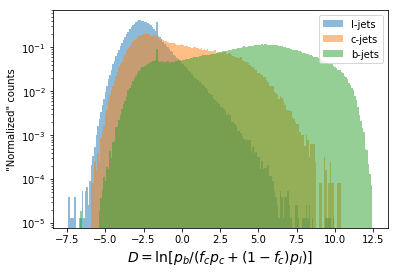

In [16]:
# Load in Zihao's model
nDense=0
doEmbedding=True
modelDir = '../../models/mc16d_PFlow_ttbar'
nFeatures = X.shape[-1]
m = myLSTM(modelDir=modelDir, nFeatures=nFeatures, dataTag=dataTagTrain, loadModel=True,
           nDense=nDense,doEmbedding=doEmbedding)

(_,_,_),disc = sigBkgEff(m, X, y, ix, figDir=figDir, subDir=subDir,returnDisc=True)

In [17]:
m.model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Continuous_trk_inputs (InputLay (None, 15, 4)        0                                            
__________________________________________________________________________________________________
Categorical_trk_inputs (InputLa (None, 15)           0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 15, 6)        30          Continuous_trk_inputs[0][0]      
                                                                 Categorical_trk_inputs[0][0]     
__________________________________________________________________________________________________
LSTM (LSTM)                     (None, 50)           11400       model_1[1][0]                    
__________

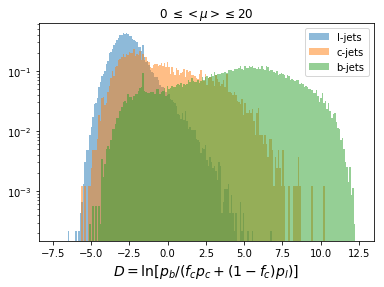

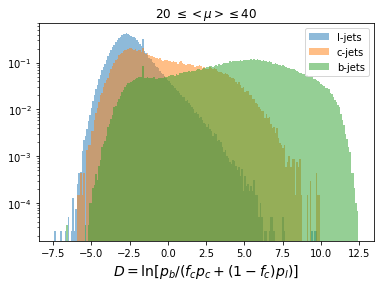

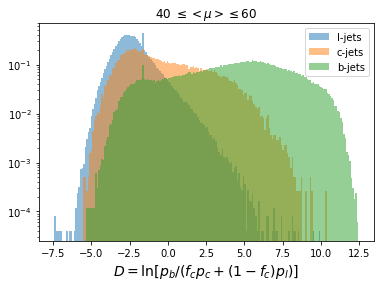

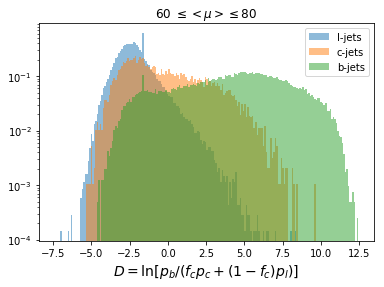

In [18]:
# Get the mu efficiencies
myRange = ( np.min(disc), np.max(disc) )

for mu_min, mu_max in zip(mu_edges[:-1], mu_edges[1:]):

    effs = []
    plt.figure()
    for output, flavor in zip([0,1,2], ['l','c','b']):

        ix = (y == output) & (mu > mu_min) & (mu < mu_max)

        # Plot the discriminant output
        nEntries, _,_ = plt.hist(disc[ix],alpha=0.5,label='{}-jets'.format(flavor),
                                 bins=nBins, range=myRange, density=True, log=True)

        # Calculate the baseline signal and bkg efficiencies
        eff = calculateEff(nEntries)
        effs.append(eff)

    # I'm not really sure why I needed this -1, but I went ahead and just included it.
    label = '{} $\leq < \mu > \leq${}'.format(mu_min-1,mu_max-1)
    plt.title(label)
    plt.legend()
    plt.xlabel('$D = \ln [ p_b / (f_c p_c + (1- f_c)p_l ) ]$',fontsize=14)

    mu_leffs.append(effs[0])
    mu_ceffs.append(effs[1])
    mu_beffs.append(effs[2])
    mu_labels.append(label)

First look at if Zihao's model has a PU dependence.

../../plottingFcts.py:526: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


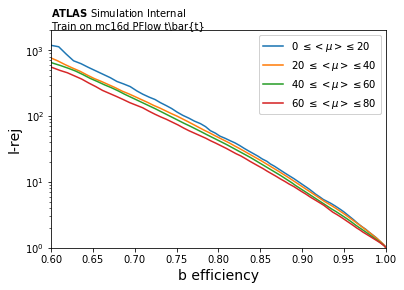

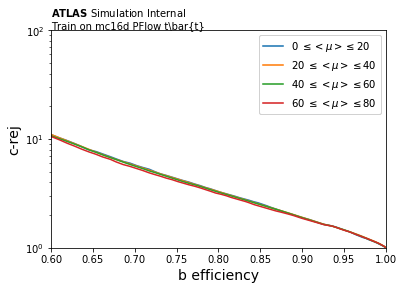

In [30]:
text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+=r"Train on mc16d PFlow t\bar{t}"

plotROC(mu_beffs[-4:], mu_leffs[-4:], fakeLabels, ylabel='l-rej',
        colors=colors,styles=styles,leg1=leg1,leg2=None,
        ymax=l_ymax,text=text) #,
#         figDir=figDir, subDir=subDir,
#         tag='lrej_{}_muBins_allMC'.format(physicsSample))
        
plotROC(mu_beffs[-4:], mu_ceffs[-4:], fakeLabels,ylabel='c-rej',
        colors=colors,styles=styles,leg1=leg1,leg2=None,
        ymax=c_ymax, text=text) #,

**Plan:** Overlay the mc16d curves for my model, and the ttbar trained Zihao model.

In [27]:
leg1 = {'colors': ['C{}'.format(i) for i in range(muBins)],
        'styles': ['-']*muBins,
        'labels': mu_labels, 'bbox_to_anchor':(1,1)}
    
leg2 = {'colors': ['grey']*len(mcs),
        'styles': ['-','--',],
        'labels': ['new architecture','old architecture'],'bbox_to_anchor':(1,0.63)}

../../plottingFcts.py:526: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(teff, np.divide(1,beff), style, color=color, label=label)


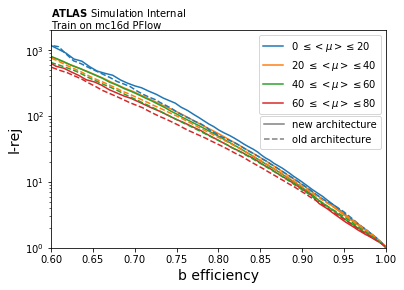

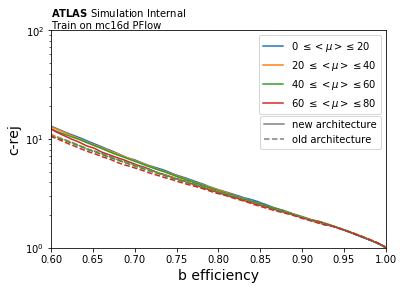

In [29]:
text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+="Train on mc16d PFlow"

plotROC(mu_beffs[:4]+mu_beffs[-4:], mu_leffs[:4]+mu_leffs[-4:], fakeLabels, ylabel='l-rej',
        colors=colors,styles=styles,leg1=leg1,leg2=leg2,
        ymax=l_ymax,text=text) #,
#         figDir=figDir, subDir=subDir,
#         tag='lrej_{}_muBins_allMC'.format(physicsSample))
        
plotROC(mu_beffs[:4]+mu_beffs[-4:], mu_ceffs[:4]+mu_ceffs[-4:], fakeLabels,ylabel='c-rej',
        colors=colors,styles=styles,leg1=leg1,leg2=leg2,
        ymax=c_ymax, text=text) #,
#         figDir=figDir, subDir=subDir,
#         tag='crej_{}_muBins_allMC'.format(physicsSample))